<a href="https://colab.research.google.com/github/purvi0116/Fruit-Quality-Detection-Using-Computer-Vision/blob/main/Fruit-Models/mango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data import random_split
import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F 
import torchvision

In [ ]:
path_train = 'drive/My Drive/itsp_mitali/mango3/train'

path_valid = 'drive/My Drive/itsp_mitali/mango3/validation'

train_transform = T.Compose([T.Resize((256,256)),T.RandomRotation(15),T.RandomHorizontalFlip(),T.CenterCrop(224),T.ToTensor()])
valid_transform = T.Compose([T.Resize((256,256)),T.CenterCrop(224),T.ToTensor()])


train_data = dset.ImageFolder(path_train,transform = train_transform)
valid_data = dset.ImageFolder(path_valid,transform = valid_transform)
train_loader = DataLoader(train_data,batch_size=20,sampler = sampler.SubsetRandomSampler(list(range(len(train_data)))))
valid_loader = DataLoader(valid_data,batch_size=20,sampler = sampler.SubsetRandomSampler(list(range(len(valid_data)))))
print(train_loader)

In [ ]:
class_list = ['ripe_bad', 'ripe_good', 'unripe_bad', 'unripe_good']
print(class_list) 

['ripe_bad', 'ripe_good', 'unripe_bad', 'unripe_good']


In [ ]:
import torchvision
import matplotlib.pyplot as plt

def imshow(image,title = '',caption = ''):
  if isinstance(image, torch.Tensor):
    image = image.cpu().numpy().transpose((2,1,0))
  else :
    image = np.array(image).transpose((2,1,0))

  image = np.clip(image, 0, 1)
  # Plot
  fig, ax = plt.subplots(1, 1, figsize = (4, 4))
  plt.imshow(image)
  ax.axis('off')
  plt.title(title + '\n' + caption)

# to visualise a batch
images,indices = next(iter(train_loader)) 

for image,index in zip(images,indices):
  out = torchvision.utils.make_grid(image)
  imshow(out,title='class',caption =class_list[index] ) 

In [ ]:
USE_GPU = True
# training on GPU
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 30

print('using device:', device)

using device: cuda


In [ ]:
# to plot losses
import matplotlib.pyplot as plt
def plot_graph(valid_acc,train_acc,num_epochs):
  epoch_range=list(range(1,num_epochs+1))
   
  plt.plot(epoch_range,valid_acc,label='validation acc')
  plt.plot(epoch_range,train_acc,label='train acc')
  plt.ylim(70,105)
  plt.legend()
  plt.show()

In [ ]:
# checking accuracy
def check_accuracy_part(loader, model):
  
    if loader == valid_loader:
      print('Checking accuracy on validation set')
    elif loader == train_loader:
      print('Checking accuracy on training set') 
    else :
      print('checking accuracy on test')
    

    num_correct = 0
    num_samples = 0
  
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
           
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
           
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
                    
      
      
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        print()
        return acc*100

In [ ]:
def train_part(model, optimizer, epochs=1):
    model = model.to(device=device)  
    best_acc = 0
    # valid_acc = []
    # train_acc =[]
    # iteration =0
    best_model = None
    for e in range(epochs):
        print(f'epoch = {e}')
      
        for t, (x, y) in enumerate(train_loader):
            model.train()  
            x = x.to(device=device, dtype=dtype)  
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                acc = check_accuracy_part(valid_loader, model)
                # valid_acc.append(acc)
                # train_acc.append(check_accuracy_part(train_loader,model))
                # iteration +=1
                              
                if acc > best_acc:
                  best_acc = acc
                  best_model = model
                  
    # plot_graph(valid_acc,train_acc,iteration)    
    return best_acc,best_model

In [ ]:
model = None
optimiser = None

model = torchvision.models.mobilenet_v2()
model.classifier[1] = nn.Linear(1280,4)
optimizer = optim.Adam(model.parameters(),lr = 1e-4,betas=(0.5,0.999))
best_acc,best_model = train_part(model,optimizer,epochs =250)
print(best_acc) 

epoch = 0
Iteration 0, loss = 1.4886
Checking accuracy on validation set
Got 18 / 109 correct (16.51)

Iteration 30, loss = 1.1915
Checking accuracy on validation set
Got 14 / 109 correct (12.84)

Iteration 60, loss = 1.0327
Checking accuracy on validation set
Got 14 / 109 correct (12.84)

epoch = 1
Iteration 0, loss = 0.9245
Checking accuracy on validation set
Got 14 / 109 correct (12.84)

Iteration 30, loss = 0.8939
Checking accuracy on validation set
Got 58 / 109 correct (53.21)

Iteration 60, loss = 0.7999
Checking accuracy on validation set
Got 73 / 109 correct (66.97)

epoch = 2
Iteration 0, loss = 0.8737
Checking accuracy on validation set
Got 75 / 109 correct (68.81)

Iteration 30, loss = 0.7601
Checking accuracy on validation set
Got 69 / 109 correct (63.30)

Iteration 60, loss = 0.8114
Checking accuracy on validation set
Got 78 / 109 correct (71.56)

epoch = 3
Iteration 0, loss = 0.6796
Checking accuracy on validation set
Got 84 / 109 correct (77.06)

Iteration 30, loss = 0.5

In [ ]:
model_save_name = 'm3.pt'
path = F"/content/drive/My Drive/itsp_mitali/mango3/{model_save_name}" 
torch.save(best_model.state_dict(), path)


In [ ]:
model_save_name = 'm3.pt'
path = F"/content/drive/My Drive/itsp_mitali/mango3/{model_save_name}" 


best_model = torchvision.models.mobilenet_v2()
best_model.classifier[1] = nn.Linear(1280,4)
best_model.load_state_dict(torch.load(path))

best_model = best_model.to(device)
best_model.eval()
# path_test = 'drive/My Drive/itsp_mitali/mango3/test'

test_transform = T.Compose([T.CenterCrop(00),T.Resize((256,256)),T.CenterCrop(224),T.ToTensor()])

# test_data = dset.ImageFolder(path_test,transform = test_transform)
# batch_size =46

# test_loader = DataLoader(test_data,batch_size =batch_size)

# check_accuracy_part(test_loader,best_model)

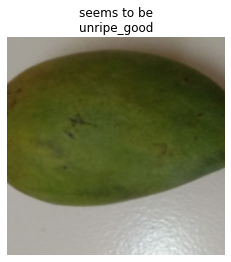

In [ ]:
class_pred = ''
path_real = 'drive/My Drive/itsp_mitali/mango/real/test101.jpg'

from PIL import Image

real = Image.open(path_real)
real_transform=test_transform(real)
real_data = real_transform.reshape((1,3,224,224))
real_data = real_data.to(device = torch.device('cuda'))
  
out = best_model(real_data)

out = F.softmax(out,1)
value,pred = out.topk(2)

value = value.detach().cpu().numpy()
pred = pred.detach().cpu().numpy()

if (pred==np.array([0,1])).all() or (pred==np.array([1,0])).all():
  if abs(float(value[0,0])-float(value[0,1]))<0.6 :
    class_pred = 'ripe and okay'
  else :
    class_pred = class_list[int(pred[0,0])]
elif (pred==np.array([2,3])).all() or (pred==np.array([3,2])).all():
  if abs(float(value[0,0])-float(value[0,1]))<0.6 :
    class_pred = 'unripe and okay'
  else :
    class_pred = class_list[int(pred[0,0])]
else :
  class_pred = class_list[int(pred[0,0])]

imshow(real_transform,title='seems to be',caption = class_pred) 


